In [96]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import time

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import make_pipeline

%matplotlib inline

from sklearn.model_selection import train_test_split



In [36]:
# læs data 
df_est = pd.read_pickle('job_kurser.pkl')

print(df_est.head())


def dan_xy(index) :
    y = np.array((np.log(df_est.iloc[index])))
    X = np.array((np.log(df_est.iloc[index+14]))).reshape(-1, 1)
    return X, y

X, y = dan_xy(7)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_eval, y_train, y_eval = train_test_split(X_dev, y_dev, test_size=.25, random_state=2)

X_train


            Carlsberg  Coloplast  Danske Bank     DSV  Jyske Bank  Nordea  \
2008-01-31    497.248       89.5      187.387  110.00     370.798   83.75   
2008-02-29    441.549       82.4      171.193   99.50     301.564   68.00   
2008-03-31    491.597       81.4      172.350   94.25     303.423   74.25   
2008-04-30    516.621       88.1      166.566  106.75     305.281   80.25   
2008-05-31    524.693       93.0      157.081  122.25     311.322   82.75   

            Novo Nordisk  Novozymes  Vestas   Tryg    ...     DSV_jobs  \
2008-01-31          65.0      117.4    78.6  552.0    ...           19   
2008-02-29          61.8       80.9    72.9  497.5    ...           38   
2008-03-31          67.5       86.9    74.9  516.0    ...           13   
2008-04-30          64.8       87.4    84.3  516.0    ...           13   
2008-05-31          64.6       90.8    83.8  516.0    ...           13   

            Jyske_Bank_jobs  Nordea_jobs  Novo_Nordisk_jobs  Novozymes_jobs  \
2008-01-31   

array([[1.94591015],
       [4.93447393],
       [5.26663576],
       [1.79175947],
       [1.60943791],
       [3.7978908 ],
       [3.80425961],
       [4.81840885],
       [2.99573227],
       [4.5685062 ],
       [3.91701055],
       [1.94591015],
       [4.34898678],
       [4.4391156 ]])

## Regression

Beta = 0.6516341206822265
Alpha =  2.2754764870443376
R^2 Train: 0.760, test: 0.859


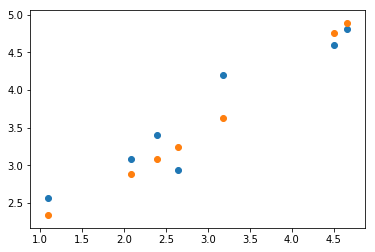

In [37]:
from sklearn.metrics import r2_score

pipe_lr = make_pipeline(PolynomialFeatures(include_bias=False),
                        StandardScaler(),
                        LinearRegression())

pipe_lr.fit(X_dev, y_dev)

print("Beta =", lr.coef_[0])
print('Alpha = ', lr.intercept_)

y_dev_hat = pipe_lr.predict(X_dev)
y_test_hat = pipe_lr.predict(X_test)

print('R^2 Train: %.3f, test: %.3f' % (r2_score(y_dev, y_dev_hat), r2_score(y_test, y_test_hat)))

plt.scatter(X_test, y_test)
plt.scatter(X_test, pipe_lr.predict(X_test))

## Lasso

### Pure lasso

In [38]:
perform = []

alphas = np.logspace(-10,-3,33)

for alpha_ in alphas:
    
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=alpha_, random_state=1))
    pipe_lasso.fit(X_train, y_train)
    perform.append([alpha_, np.sqrt(mse(pipe_lasso.predict(X_eval),y_eval)), 
                    np.sqrt(mse(pipe_lasso.predict(X_test),y_test))])
    
pf = pd.DataFrame(perform)
headers = ['alpha', 'RMSE_eval', 'RMSE_test']
pf.columns = headers
pf.set_index('alpha')
print(pf)
pf.nsmallest(1, 'RMSE_test')



           alpha  RMSE_eval  RMSE_test
0   1.000000e-10   0.515534   0.263842
1   1.654817e-10   0.515534   0.263842
2   2.738420e-10   0.515534   0.263842
3   4.531584e-10   0.515534   0.263842
4   7.498942e-10   0.515534   0.263842
5   1.240938e-09   0.515534   0.263842
6   2.053525e-09   0.515534   0.263842
7   3.398208e-09   0.515534   0.263842
8   5.623413e-09   0.515534   0.263842
9   9.305720e-09   0.515534   0.263842
10  1.539927e-08   0.515534   0.263842
11  2.548297e-08   0.515534   0.263842
12  4.216965e-08   0.515534   0.263842
13  6.978306e-08   0.515535   0.263842
14  1.154782e-07   0.515536   0.263843
15  1.910953e-07   0.515537   0.263843
16  3.162278e-07   0.515540   0.263843
17  5.232991e-07   0.515543   0.263844
18  8.659643e-07   0.515550   0.263845
19  1.433013e-06   0.515561   0.263847
20  2.371374e-06   0.515579   0.263850
21  3.924190e-06   0.515608   0.263855
22  6.493816e-06   0.515657   0.263863
23  1.074608e-05   0.515738   0.263876
24  1.778279e-05   0.5158

,alpha,RMSE_eval,RMSE_test
32,0.001,0.517146,0.263705


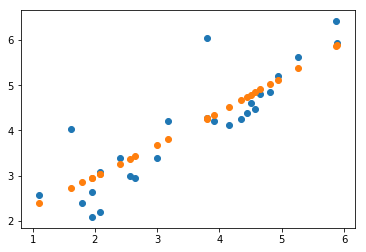

In [39]:
pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=0.001, random_state=1))
pipe_lasso.fit(X_train, y_train)
y_hat = pipe_lasso.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_hat)


### kFold

In [ ]:
from sklearn.model_selection import KFold

kfolds = KFold(n_splits=5)

mseCV = []

lambdas =  np.logspace(-5, 4, 12)

for lambda_ in lambdas:
   
    pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    mseCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        X_train, y_train = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        
        msetest = mse(pipe_lassoCV.predict(X_test), y_test)
        mseCV_.append(msetest)    
    mseCV.append(np.mean(mseCV_))

optimal = pd.Series(mseCV,index=lambdas).nsmallest(1)
print("Optimal lambda")
print("lambda"," "*5, "Mean MSE")
print(optimal)


## Bag of words

### Stopwords

In [119]:
import nltk
stopwords = nltk.corpus.stopwords.words('danish')


### Get data and fit the CountVectorizer

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

ny1 = pd.read_pickle('both1.pkl')
ny2 = pd.read_pickle('both2.pkl')
ny4 = pd.read_pickle('both4.pkl')

df_both = pd.concat([ny1, ny2, ny4], axis=0, join='inner', ignore_index=True)

#print("Shape", df_both.shape)
#print("\n")
#print(df_both.head(1), "\n", df_both.tail(2))

desc = df_both.sample(60000, random_state=5)

#print(desc)


t0 = time.time()

count=TfidfVectorizer(ngram_range=(1, 3), max_df=.1, max_features=5000)
bag = count.fit_transform(desc['job_describ'].values)

t1 = time.time()

print("Procestid er", int((t1-t0)/60), "minutter og", round((t1-t0)%60, 2), "sekunder")

# 10000 linier: Procestid er 0 minutter og 0.78 sekunder

Procestid er 0 minutter og 17.5 sekunder


In [136]:
t0 = time.time()

X = count.transform(desc['job_describ'])

t1 = time.time()

print("Procestid er", int((t1-t0)/60), "minutter og", round((t1-t0)%60, 2), "sekunder")

# 10000 linier: Procestid er 0 minutter og 0.49 sekunder

Procestid er 0 minutter og 6.59 sekunder


In [137]:
print(X.shape)
# print(type(X))


(60000, 5000)


## LatentDirichletAllocation

In [138]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=20, random_state=5, learning_method='batch')
t0 = time.time()

X_topics = lda.fit_transform(X)

t1 = time.time()

print("Procestid er {} minutter og {} sekunder".format(int((t1-t0)/60),round((t1-t0)%60, 2)))

# 10000 linier: Procestid er 0 minutter og 30.01 sekunder

Procestid er 2 minutter og 25.17 sekunder


In [91]:
print(lda.components_.shape)


(10, 2000)


In [139]:
n_top_words = 15
feature_names = count.get_feature_names()
for cat_idx, cat in (enumerate(lda.components_)) :
    print("Category %d:" % (cat_idx + 1))
    print(" ".join([feature_names[i] for i in cat.argsort()[:-n_top_words - 1:-1]]))
    

Category 1:
medarbejder muligt medarbejder til rengøring vi søger hurtigst hurtigst muligt en medarbejder til rengøring vi søger en frisk mangler och muligt en søges
Category 2:
kan det er du dig så skal kan du have god du er måske være for at så er du skal
Category 3:
timer pr 37 37 timer uge pædagog 30 snarest eller ugen 2009 om ugen 2010 pr uge timer pr
Category 4:
være være med vil du du være vil du være med til med til at være med til du være med del af en del en del af være en udvikle være en del
Category 5:
søges søges til dygtig til vores søger vi vi søger en dygtig snarest tiltrædelse vi søger en søger vi en vi en søges en job fra et job fra
Category 6:
efter løn overenskomst aftale efter aftale løn efter eller efter henhold henhold til nyt eller efter aftale løn og et nyt mail løn efter aftale
Category 7:
for at blive oprettet konsulenter kontakt med en vores konsulenter med en af du kontakt du kontakt med blive oprettet af vores konsulenter at blive virksomhedsbruger skal du

In [86]:
cat5 = X_topics[:, 4].argsort()[::-1]

for iter_idx, post_idx in enumerate(cat5[:3]) :
#    print(iter_idx, post_idx)
    print(desc['job_describ'].iloc[post_idx], "\n")

Sondrup Bilcenter A/S er en moderne handelsvirksomhed i stadig ekspansion. Vi er autoriseret Volvo og Renault forhandler, og har 5 afdelinger i Østjylland, med hovedkontor i Viby. Sondrup Bilcenter A/S ha 

Hos Euromaster Danmark A/S har vi søger vi en montør/udemontør til vores center i Skejby Om jobbet: - Montering af dæk på biler lastbiler og... 

Er du en ildsjæl der har lyst til at være med på holdet der udvikler fælles ledelsesinformation i en af Danmarks største virksomheder - så... 

